# Feature engineering
### How are trading volume and volatility related for energy stocks?

In [1]:
# Import the Pandas package
import pandas as pd
# Import the Matplotlib package (for plotting)
import matplotlib.pyplot as plt

In [2]:
D = pd.read_csv('Data/D.csv')

In [3]:
D.head()

,Date,Open,High,Low,Close,Volume
0,2014-07-01,63.406,63.486,62.618,63.077,3626031
1,2014-07-02,62.929,62.935,61.403,61.730,4079097
2,2014-07-03,61.394,61.394,60.303,60.863,2937489
3,2014-07-07,60.718,61.430,60.611,61.038,3122145
4,2014-07-08,60.931,61.348,60.880,61.296,3048285


In [5]:
D.Date = pd.to_datetime(D.Date)

In [8]:
D = D.set_index('Date')

In [9]:
D

,Open,High,Low,Close,Volume
Date,,,,,
2014-07-01,63.406,63.486,62.618,63.077,3626031
2014-07-02,62.929,62.935,61.403,61.730,4079097
2014-07-03,61.394,61.394,60.303,60.863,2937489
2014-07-07,60.718,61.430,60.611,61.038,3122145
2014-07-08,60.931,61.348,60.880,61.296,3048285
...,...,...,...,...,...
2017-11-06,80.670,80.780,80.130,80.560,1701022
2017-11-07,80.740,81.620,80.740,81.390,1698149
2017-11-08,81.390,81.610,80.330,80.880,1973968


In [11]:
DUK = pd.read_csv("Data/DUK.csv")
DUK = DUK.set_index('Date')

EXC = pd.read_csv("Data/EXC.csv")
EXC = EXC.set_index('Date')

NEE = pd.read_csv("Data/NEE.csv")
NEE = NEE.set_index('Date')

SO = pd.read_csv("Data/SO.csv")
SO = SO.set_index('Date')

In [17]:
D

,Open,High,Low,Close,Volume,symbol
Date,,,,,,
2014-07-01,63.406,63.486,62.618,63.077,3626031,D
2014-07-02,62.929,62.935,61.403,61.730,4079097,D
2014-07-03,61.394,61.394,60.303,60.863,2937489,D
2014-07-07,60.718,61.430,60.611,61.038,3122145,D
2014-07-08,60.931,61.348,60.880,61.296,3048285,D
...,...,...,...,...,...,...
2017-11-06,80.670,80.780,80.130,80.560,1701022,D
2017-11-07,80.740,81.620,80.740,81.390,1698149,D
2017-11-08,81.390,81.610,80.330,80.880,1973968,D


In [18]:
D['symbol'] = "D"
DUK['symbol'] = "DUK"
EXC['symbol'] = "EXC"
NEE['symbol'] = "NEE"
SO['symbol'] = "SO"

In [21]:
stocks = pd.concat([D, DUK, EXC, NEE, SO])
stocks

,Open,High,Low,Close,Volume,symbol
Date,,,,,,
2014-07-01 00:00:00,63.406,63.4860,62.618,63.077,3626031,D
2014-07-02 00:00:00,62.929,62.9350,61.403,61.730,4079097,D
2014-07-03 00:00:00,61.394,61.3940,60.303,60.863,2937489,D
2014-07-07 00:00:00,60.718,61.4300,60.611,61.038,3122145,D
2014-07-08 00:00:00,60.931,61.3480,60.880,61.296,3048285,D
...,...,...,...,...,...,...
2017-11-06,52.340,52.3466,51.560,51.650,5631874,SO
2017-11-07,51.720,51.9900,51.310,51.720,5453980,SO
2017-11-08,51.740,52.0000,51.240,51.770,5424971,SO


# calculamos el return con `shift()`
Es el precio de hoy sobre el precio de ayer menos 1


In [26]:
D['High'].to_frame()

,High
Date,
2014-07-01,63.486
2014-07-02,62.935
2014-07-03,61.394
2014-07-07,61.430
2014-07-08,61.348
...,...
2017-11-06,80.780
2017-11-07,81.620
2017-11-08,81.610


In [29]:
D['High'].shift(-1).to_frame()    #Nos regresa el valo en la posicion -1

,High
Date,
2014-07-01,62.935
2014-07-02,61.394
2014-07-03,61.430
2014-07-07,61.348
2014-07-08,61.501
...,...
2017-11-06,81.620
2017-11-07,81.610
2017-11-08,81.355


In [31]:
D['Close_Previous'] = D.Close.shift(1)
D.head()

,Open,High,Low,Close,Volume,symbol,Close_Previous
Date,,,,,,,
2014-07-01,63.406,63.486,62.618,63.077,3626031,D,NaN
2014-07-02,62.929,62.935,61.403,61.730,4079097,D,63.077
2014-07-03,61.394,61.394,60.303,60.863,2937489,D,61.730
2014-07-07,60.718,61.430,60.611,61.038,3122145,D,60.863
2014-07-08,60.931,61.348,60.880,61.296,3048285,D,61.038


In [32]:
D['Return'] = (D.Close / D.Close_Previous) - 1
D.head()

,Open,High,Low,Close,Volume,symbol,Close_Previous,Return
Date,,,,,,,,
2014-07-01,63.406,63.486,62.618,63.077,3626031,D,NaN,NaN
2014-07-02,62.929,62.935,61.403,61.730,4079097,D,63.077,-0.021355
2014-07-03,61.394,61.394,60.303,60.863,2937489,D,61.730,-0.014045
2014-07-07,60.718,61.430,60.611,61.038,3122145,D,60.863,0.002875
2014-07-08,60.931,61.348,60.880,61.296,3048285,D,61.038,0.004227


In [33]:
stocks["Volume_Millions"] = stocks["Volume"] / 1000000
stocks.head(10)

,Open,High,Low,Close,Volume,symbol,Volume_Millions
Date,,,,,,,
2014-07-01 00:00:00,63.406,63.486,62.618,63.077,3626031,D,3.626031
2014-07-02 00:00:00,62.929,62.935,61.403,61.730,4079097,D,4.079097
2014-07-03 00:00:00,61.394,61.394,60.303,60.863,2937489,D,2.937489
2014-07-07 00:00:00,60.718,61.430,60.611,61.038,3122145,D,3.122145
2014-07-08 00:00:00,60.931,61.348,60.880,61.296,3048285,D,3.048285
2014-07-09 00:00:00,61.385,61.501,60.897,61.340,1948182,D,1.948182
2014-07-10 00:00:00,61.260,62.049,61.163,62.031,2471888,D,2.471888
2014-07-11 00:00:00,61.871,62.031,61.535,61.607,1418862,D,1.418862
2014-07-14 00:00:00,61.802,61.827,61.057,61.075,1810671,D,1.810671


In [34]:
stocks["VolStat"] = (stocks["High"] - stocks["Low"]) / stocks["Open"]

[]

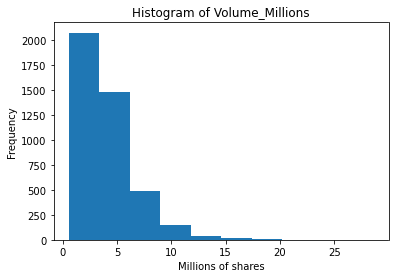

In [35]:
hvm = stocks['Volume_Millions'].plot.hist()

hvm.set_title("Histogram of Volume_Millions")
hvm.set_xlabel("Millions of shares")

plt.plot()

[]

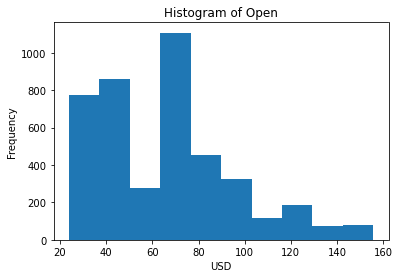

In [36]:
hvm = stocks['Open'].plot.hist()

hvm.set_title("Histogram of Open")
hvm.set_xlabel("USD")

plt.plot()

# Summary Statistics

In [37]:
stocks.Close.min()

23.84

In [39]:
stocks.Close.quantile([0.25,0.75])

0.25    40.63975
0.75    80.26200
Name: Close, dtype: float64

In [43]:
stocks.groupby(['symbol'])['VolStat'].describe()

,count,mean,std,min,25%,50%,75%,max
symbol,,,,,,,,
D,850.0,0.014364,0.006420,0.003636,0.009789,0.013084,0.017269,0.049232
DUK,850.0,0.014070,0.006368,0.003548,0.009649,0.012351,0.017350,0.054170
EXC,850.0,0.018529,0.008725,0.005390,0.012319,0.016744,0.022779,0.093240
NEE,850.0,0.014801,0.006672,0.004454,0.010192,0.013178,0.017617,0.056885
SO,850.0,0.013325,0.005952,0.002926,0.009068,0.012017,0.015934,0.047707


In [45]:
stocks.index = pd.to_datetime(stocks.index)


symbol
D      AxesSubplot(0.125,0.2;0.775x0.68)
DUK    AxesSubplot(0.125,0.2;0.775x0.68)
EXC    AxesSubplot(0.125,0.2;0.775x0.68)
NEE    AxesSubplot(0.125,0.2;0.775x0.68)
SO     AxesSubplot(0.125,0.2;0.775x0.68)
Name: VolStat, dtype: object

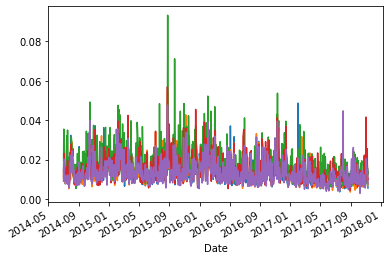

In [46]:
stocks.groupby('symbol')['VolStat'].plot()

symbol
D      AxesSubplot(0.125,0.2;0.775x0.68)
DUK    AxesSubplot(0.125,0.2;0.775x0.68)
EXC    AxesSubplot(0.125,0.2;0.775x0.68)
NEE    AxesSubplot(0.125,0.2;0.775x0.68)
SO     AxesSubplot(0.125,0.2;0.775x0.68)
Name: VolStat, dtype: object

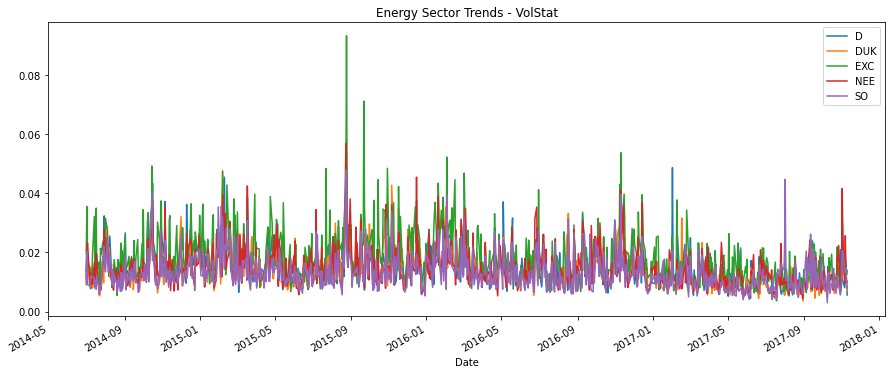

In [48]:
stocks.groupby("symbol")["VolStat"].plot(legend=True,
                                         title="Energy Sector Trends - VolStat",
                                         figsize=(15,6)
                                        )